In [65]:
#libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [66]:
#constants
nsamp = 50
dim = 2
s= 0.5

In [67]:
#generate data
c0mean = np.ones(dim)
c0cov = 0.5 * np.eye(dim)

c0_samples = np.random.multivariate_normal(c0mean, c0cov, nsamp)
c0_y = np.zeros(nsamp)

c1mean = -1 * np.ones(dim)
c1cov = 0.2 * np.eye(dim)

c1_samples = np.random.multivariate_normal(c1mean, c1cov, nsamp)
c1_y = np.ones(nsamp)

In [68]:
#define objective function, stack data for computation
X = np.column_stack((np.ones(nsamp*2), np.vstack([c0_samples, c1_samples])))
y = np.hstack([c0_y, c1_y])
def crossentropy_loss(w):
    loss = y.T @ np.log(1 + np.exp(-w @ X.T)) + (1 - y).T @ np.log(1 + np.exp(w @ X.T))
    return loss

In [69]:
#minimize cross entropy loss 
res = minimize(crossentropy_loss, [0,0,0], method='BFGS', options={'disp': True})
w = res.x

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 27
         Function evaluations: 112
         Gradient evaluations: 28


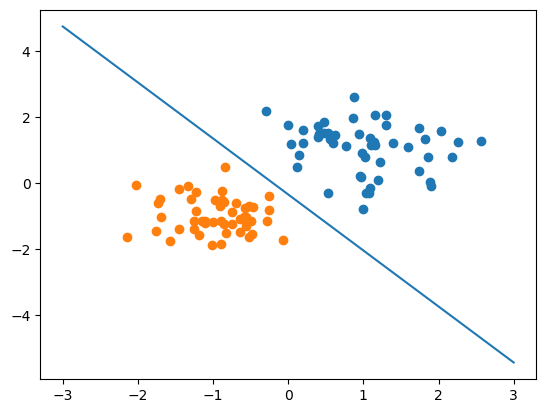

In [71]:
#plot stuff
plt.scatter(c0_samples[:,0], c0_samples[:,1])
plt.scatter(c1_samples[:,0], c1_samples[:,1])
xvalues = np.linspace(-3,3,100)
plt.plot(xvalues, -(w[0] + w[1] * xvalues) / w[2])

In [53]:
#gbf function
def gbf(x, mean, s, axis):
    value = np.exp(-(1 / 2 * s**2) * np.sum((x - mean)**2, axis))
    return value

In [72]:
#define objective function, stack data for computation
m = np.vstack([c0_samples, c1_samples])
Xg = np.column_stack((np.ones(nsamp*2), gbf(m,[-1,1],s,1), gbf(m, [0,0],s,1), gbf(m, [1,-1],s,1)))
yg = np.hstack([c0_y, c1_y])
def crossentropy_loss_gaussian(wg):
    NLL = yg.T @ np.log(1 + np.exp(-wg @ Xg.T)) + (1 - yg).T @ np.log(1 + np.exp(wg @ Xg.T))
    return NLL

In [73]:
#minimize cross-entropy loss with gaussian basis 
res_g = minimize(crossentropy_loss_gaussian, np.zeros(4), method='BFGS', options={'disp': True})
wg = res_g.x

Optimization terminated successfully.
         Current function value: 62.876673
         Iterations: 20
         Function evaluations: 115
         Gradient evaluations: 23


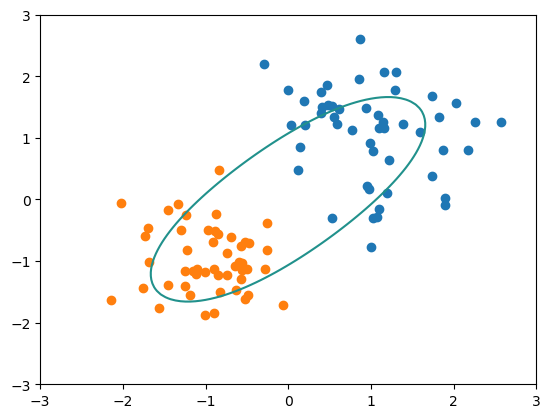

In [74]:
#plot stuff
plt.scatter(c0_samples[:,0], c0_samples[:,1])
plt.scatter(c1_samples[:,0], c1_samples[:,1])
xvalues = np.linspace(-3,3,100)
x1,x2 = np.meshgrid(xvalues, xvalues)
xmesh = np.stack((x1,x2)).T
Z = wg[0] + wg[1]*gbf(xmesh,[-1,1],s,2) + wg[2]*gbf(xmesh, [0,0],s,2) + wg[3]*gbf(xmesh, [1,-1],s,2)
plt.contour(x1,x2,Z,0)
#plt.plot(xvalues, -(w[0] + w[1] * xvalues) / w[2])

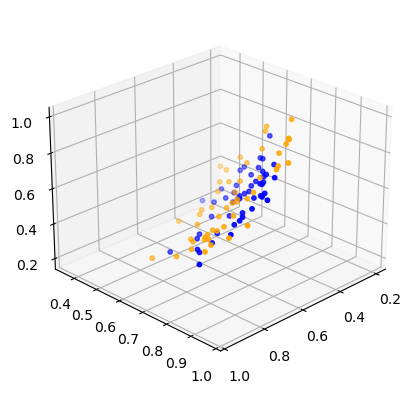

In [83]:
#graph data points after gaussian basis transformation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(gbf(c0_samples,[-1,1],s,1),gbf(c0_samples,[0,0],s,1),gbf(c0_samples,[1,-1],s,1), s=10, color="orange")
ax.scatter(gbf(c1_samples,[-1,1],s,1),gbf(c1_samples,[0,0],s,1),gbf(c1_samples,[1,-1],s,1), s=10, color="blue")
ax.view_init(25, 45)

In [76]:
#define objective function, stack data for computation
m = np.vstack([c0_samples, c1_samples])
Xg2 = np.column_stack((np.ones(nsamp*2), gbf(m,[-1,-1],s,1), gbf(m, [1,1],s,1)))
yg2 = np.hstack([c0_y, c1_y])
def loss_gaussian2(wg2):
    NLL = yg2.T @ np.log(1 + np.exp(-wg2 @ Xg2.T)) + (1 - yg2).T @ np.log(1 + np.exp(wg2 @ Xg2.T))
    return NLL

In [84]:
#minimize cross-entropy loss with new gaussian basis functions 
res_g2 = minimize(loss_gaussian2, np.zeros(3), method='BFGS', options={'disp': True})
wg2 = res_g2.x

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 29
         Function evaluations: 124
         Gradient evaluations: 31


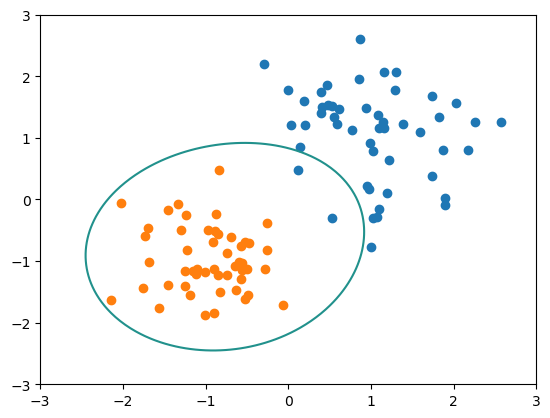

In [78]:
#plot stuff
plt.scatter(c0_samples[:,0], c0_samples[:,1])
plt.scatter(c1_samples[:,0], c1_samples[:,1])
xvalues = np.linspace(-3,3,100)
x1,x2 = np.meshgrid(xvalues, xvalues)
xmesh = np.stack((x1,x2)).T
Z = wg2[0] + wg2[1]*gbf(xmesh,[-1,-1],s,2) + wg[2]*gbf(xmesh, [1,1],s,2)
plt.contour(x1,x2,Z,0)
#plt.plot(xvalues, -(w[0] + w[1] * xvalues) / w[2])

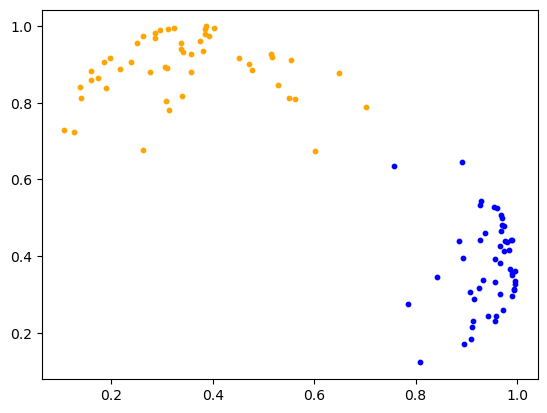

In [88]:
#graph data points after new gaussian basis transformation
plt.scatter(gbf(c0_samples,[-1,-1],s,1),gbf(c0_samples,[1,1],s,1), s=10, color="orange")
plt.scatter(gbf(c1_samples,[-1,-1],s,1),gbf(c1_samples,[1,1],s,1), s=10, color="blue")